In [2]:
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline 
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [3]:
dataset = pd.read_csv("synthetic_data_generation-sales_history.csv", index_col=0)

In [4]:
dataset_sales = dataset.drop(['transaction_id', 'branch_name', 'branch_id', 'employee_name', 'employee_id', 'created_at', 'medium',
            'updated_at', 'osp_key', 'app_key', 'entity_id', 'business_id', 'transaction_type', 'sub_total', 'transaction_discount',
            'transaction_surcharge', 'time_zone_id', 'total_line_discount', 'total_line_surcharge'], axis='columns')

In [5]:
dataset_sales

,transaction_total,transaction_created_utc
0,9.67,2019-03-05 21:52:26
1,8.69,2019-03-05 21:51:03
2,8.82,2019-03-05 21:44:14
3,13.06,2019-03-05 21:49:40
4,7.23,2019-03-05 21:51:38
...,...,...
52810,14.00,2019-09-20 03:12:11
52811,20.46,2019-09-20 03:12:46
52812,6.88,2019-09-20 03:16:20
52813,11.56,2019-09-20 03:17:59


In [6]:
dataset_sales.to_csv(r'../SciPY/Original_sales_history.csv')

In [7]:
dataset_sales['transaction_created_utc'] = pd.to_datetime(dataset_sales['transaction_created_utc'], infer_datetime_format=True)
IndexedDataset = dataset_sales.set_index(['transaction_created_utc'])

In [8]:
IndexedDataset

,transaction_total
transaction_created_utc,
2019-03-05 21:52:26,9.67
2019-03-05 21:51:03,8.69
2019-03-05 21:44:14,8.82
2019-03-05 21:49:40,13.06
2019-03-05 21:51:38,7.23
...,...
2019-09-20 03:12:11,14.00
2019-09-20 03:12:46,20.46
2019-09-20 03:16:20,6.88


In [9]:
IndexedDataset.to_csv(r'../SciPY/Original_sales_history.csv')

In [10]:
IndexedDataset = dataset_sales.sort_values(by="transaction_created_utc")

In [11]:
IndexedDataset.describe()

,transaction_total
count,52815.000000
mean,20.913197
std,19.836191
min,-35.130000
25%,9.060000
50%,15.440000
75%,26.630000
max,1115.230000


In [12]:
IndexedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52815 entries, 31886 to 52814
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_total        52815 non-null  float64       
 1   transaction_created_utc  52815 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


In [13]:
IndexedDataset.head(100)

,transaction_total,transaction_created_utc
31886,21.34,2018-08-31 21:22:35
31883,18.85,2018-08-31 21:27:53
31882,3.54,2018-08-31 21:31:06
31890,5.57,2018-08-31 21:33:47
31889,18.33,2018-08-31 22:13:22
...,...,...
31781,11.41,2018-09-01 03:51:21
31798,10.26,2018-09-01 03:53:04
31793,24.75,2018-09-01 03:58:07
31787,25.10,2018-09-01 04:05:37


In [14]:
IndexedDataset.to_csv("IndexedDataset.csv")

In [15]:
dataset = pd.read_csv("IndexedDataset.csv", index_col=0)
dataset['transaction_created_utc']=pd.to_datetime(dataset['transaction_created_utc'], infer_datetime_format=True)
indexedDataset=dataset.set_index(['transaction_created_utc'])

In [16]:
IndexedDataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52815 entries, 31886 to 52814
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_total        52815 non-null  float64       
 1   transaction_created_utc  52815 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1)
memory usage: 1.2 MB


In [17]:
IndexedDataset.tail(20)

,transaction_total,transaction_created_utc
52786,7.15,2019-09-20 02:20:47
52797,17.35,2019-09-20 02:21:18
52798,8.40,2019-09-20 02:23:34
52799,19.31,2019-09-20 02:26:59
52800,42.41,2019-09-20 02:30:15
52801,10.23,2019-09-20 02:34:36
52802,10.65,2019-09-20 02:37:05
52803,9.50,2019-09-20 02:38:40
52796,91.20,2019-09-20 02:40:24
52804,41.30,2019-09-20 02:51:27


In [18]:
IndexedDataset.head(20)

,transaction_total,transaction_created_utc
31886,21.34,2018-08-31 21:22:35
31883,18.85,2018-08-31 21:27:53
31882,3.54,2018-08-31 21:31:06
31890,5.57,2018-08-31 21:33:47
31889,18.33,2018-08-31 22:13:22
31881,18.98,2018-08-31 22:19:17
31887,28.79,2018-08-31 22:27:21
31885,19.07,2018-08-31 22:29:21
31888,7.09,2018-08-31 22:31:14
31869,9.53,2018-08-31 22:41:13


In [19]:
IndexedDataset['Date'] = pd.to_datetime(IndexedDataset['transaction_created_utc'])
IndexedDataset = IndexedDataset.set_index('Date')
IndexedDataset.drop(['transaction_created_utc'], axis=1, inplace=True)
IndexedDataset.head()

,transaction_total
Date,
2018-08-31 21:22:35,21.34
2018-08-31 21:27:53,18.85
2018-08-31 21:31:06,3.54
2018-08-31 21:33:47,5.57
2018-08-31 22:13:22,18.33


In [20]:
IndexedDataset.to_csv("IndexedDataset.csv")

In [21]:
IndexedDataset.rename(columns={'transaction_total':'Sales'}, inplace=True)

In [22]:
IndexedDataset.rename(columns={'sales':'Sales'}, inplace=True)

In [23]:
IndexedDataset.tail(2)

,Sales
Date,
2019-09-20 03:17:59,11.56
2019-09-20 03:19:47,12.26


In [24]:
IndexedDataset.describe()

,Sales
count,52815.000000
mean,20.913197
std,19.836191
min,-35.130000
25%,9.060000
50%,15.440000
75%,26.630000
max,1115.230000


In [25]:
IndexedDataset.to_csv("IndexedDataset.csv")

In [26]:
IndexedDataset['2018-08-31':'2019-02-25']

,Sales
Date,
2018-08-31 21:22:35,21.34
2018-08-31 21:27:53,18.85
2018-08-31 21:31:06,3.54
2018-08-31 21:33:47,5.57
2018-08-31 22:13:22,18.33
...,...
2019-02-25 23:41:51,8.98
2019-02-25 23:42:41,9.54
2019-02-25 23:50:56,31.84


In [27]:
##The basic data frame that we’ve populated gives us data on an hourly frequency,
##but we can resample the data at a different frequency and specify how 
##we would like to compute the summary statistic for the new sample frequency.
##We could take the min, max, average, sum, etc., 
##of the data at a daily frequency instead of an hourly frequency
##as per the example below where we compute the daily/hourly average of the data:

In [28]:
IndexedDataset.resample('H').mean()

,Sales
Date,
2018-08-31 21:00:00,12.325000
2018-08-31 22:00:00,13.600000
2018-08-31 23:00:00,19.946364
2018-09-01 00:00:00,32.272778
2018-09-01 01:00:00,20.965217
...,...
2019-09-19 23:00:00,18.132174
2019-09-20 00:00:00,23.824737
2019-09-20 01:00:00,31.114667


In [29]:
IndexedDataset.resample('D').mean()

,Sales
Date,
2018-08-31,15.996667
2018-09-01,22.081226
2018-09-02,21.992650
2018-09-03,16.788030
2018-09-04,17.831296
...,...
2019-09-16,18.474607
2019-09-17,23.139206
2019-09-18,22.712532


In [30]:
IndexedDataset.head(2)

,Sales
Date,
2018-08-31 21:22:35,21.34
2018-08-31 21:27:53,18.85


In [31]:
IndexedDataset['2018-08-31':'2019-02-25']

,Sales
Date,
2018-08-31 21:22:35,21.34
2018-08-31 21:27:53,18.85
2018-08-31 21:31:06,3.54
2018-08-31 21:33:47,5.57
2018-08-31 22:13:22,18.33
...,...
2019-02-25 23:41:51,8.98
2019-02-25 23:42:41,9.54
2019-02-25 23:50:56,31.84


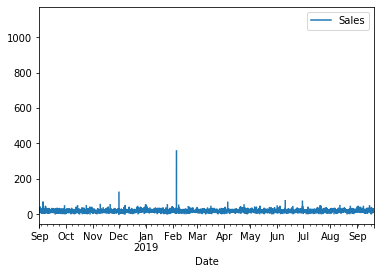

In [32]:
%matplotlib inline
IndexedDataset.resample('H').mean().plot()

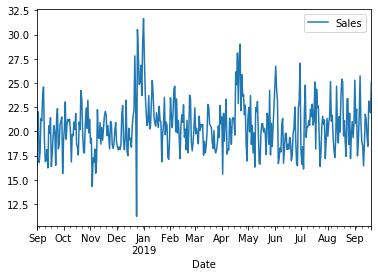

In [33]:
%matplotlib inline
IndexedDataset.resample('D').mean().plot()

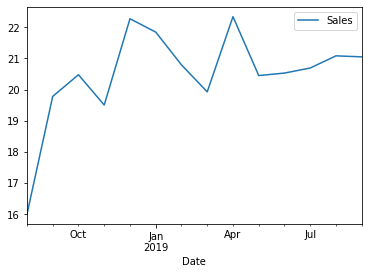

In [34]:
%matplotlib inline
IndexedDataset.resample('M').mean().plot()

In [35]:
%matplotlib inline
IndexedDataset.resample('H').mean()

,Sales
Date,
2018-08-31 21:00:00,12.325000
2018-08-31 22:00:00,13.600000
2018-08-31 23:00:00,19.946364
2018-09-01 00:00:00,32.272778
2018-09-01 01:00:00,20.965217
...,...
2019-09-19 23:00:00,18.132174
2019-09-20 00:00:00,23.824737
2019-09-20 01:00:00,31.114667
